In [1]:
# import modules
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.style.use('ggplot')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# generate synthetic data for linear regression
# set random seed
np.random.seed(9)
# draw 100 random numbers from uniform dist [0, 1]
x = np.random.uniform(0, 1, (100, 1))
# draw random noise from standard normal
z = np.random.normal(0, .1, (100, 1))
# create ground truth for y = 8x - 3
y = 3 * x - 1 + z

In [3]:
# split data into train and test
x_train, y_train = x[:80], y[:80]
x_val, y_val = x[80:], y[80:]

print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
# move data from numpy to torch
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
x_val_tensor = torch.from_numpy(x_val).float().to(device)
y_val_tensor = torch.from_numpy(y_val).float().to(device)
print(type(x_train_tensor))

<class 'torch.Tensor'>


In [5]:
# create trainable parameters for the model
weight = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
bias = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(weight, bias)

tensor([-1.0688], requires_grad=True) tensor([-0.6226], requires_grad=True)


In [6]:
# set training routine
lr = 1e-1
n_epochs = 500

# train model
losses = []
val_losses = []
for epoch in range(n_epochs):
    print("[ epoch ]", epoch)
    yhat = bias + weight * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    losses.append(loss.item())
    print("[ training ] training loss = {}".format(loss))
    # calculate gradients
    loss.backward()
    # update weight and bias
    with torch.no_grad():
        bias -= lr * bias.grad
        weight -= lr * weight.grad
    # zero out grads
    bias.grad.zero_()
    weight.grad.zero_()

    # eval
    with torch.no_grad():
        yhat = bias + weight * x_val_tensor
        error = y_val_tensor - yhat
        val_loss = (error ** 2).mean()
        val_losses.append(val_loss.item())
        print("[ eval ] validation loss = {}".format(val_loss))
    
print("linear.weight = {}, linear.bias = {}".format(weight, bias))

[ epoch ] 0
[ training ] training loss = 4.024172782897949
[ eval ] validation loss = 1.9201282262802124
[ epoch ] 1
[ training ] training loss = 2.627333164215088
[ eval ] validation loss = 1.339868187904358
[ epoch ] 2
[ training ] training loss = 1.8359190225601196
[ eval ] validation loss = 1.0363456010818481
[ epoch ] 3
[ training ] training loss = 1.3837190866470337
[ eval ] validation loss = 0.8800220489501953
[ epoch ] 4
[ training ] training loss = 1.1216756105422974
[ eval ] validation loss = 0.8004370927810669
[ epoch ] 5
[ training ] training loss = 0.9663246273994446
[ eval ] validation loss = 0.7596678137779236
[ epoch ] 6
[ training ] training loss = 0.870928168296814
[ eval ] validation loss = 0.7376121282577515
[ epoch ] 7
[ training ] training loss = 0.8093125224113464
[ eval ] validation loss = 0.7238497734069824
[ epoch ] 8
[ training ] training loss = 0.7668172121047974
[ eval ] validation loss = 0.7131634950637817
[ epoch ] 9
[ training ] training loss = 0.7352281

[ training ] training loss = 0.03952612355351448
[ eval ] validation loss = 0.048557497560977936
[ epoch ] 133
[ training ] training loss = 0.03874849155545235
[ eval ] validation loss = 0.047727204859256744
[ epoch ] 134
[ training ] training loss = 0.03799041360616684
[ eval ] validation loss = 0.046917036175727844
[ epoch ] 135
[ training ] training loss = 0.03725142031908035
[ eval ] validation loss = 0.04612647742033005
[ epoch ] 136
[ training ] training loss = 0.036531005054712296
[ eval ] validation loss = 0.04535505920648575
[ epoch ] 137
[ training ] training loss = 0.03582870960235596
[ eval ] validation loss = 0.04460228979587555
[ epoch ] 138
[ training ] training loss = 0.03514408692717552
[ eval ] validation loss = 0.04386772960424423
[ epoch ] 139
[ training ] training loss = 0.034476667642593384
[ eval ] validation loss = 0.043150924146175385
[ epoch ] 140
[ training ] training loss = 0.033826060593128204
[ eval ] validation loss = 0.04245143011212349
[ epoch ] 141
[ t

[ training ] training loss = 0.008944490924477577
[ eval ] validation loss = 0.013959737494587898
[ epoch ] 311
[ training ] training loss = 0.008936150930821896
[ eval ] validation loss = 0.01394509058445692
[ epoch ] 312
[ training ] training loss = 0.008928020484745502
[ eval ] validation loss = 0.013930732384324074
[ epoch ] 313
[ training ] training loss = 0.008920090273022652
[ eval ] validation loss = 0.013916654512286186
[ epoch ] 314
[ training ] training loss = 0.00891236774623394
[ eval ] validation loss = 0.01390286348760128
[ epoch ] 315
[ training ] training loss = 0.008904833346605301
[ eval ] validation loss = 0.013889342546463013
[ epoch ] 316
[ training ] training loss = 0.00889748614281416
[ eval ] validation loss = 0.013876083306968212
[ epoch ] 317
[ training ] training loss = 0.008890326134860516
[ eval ] validation loss = 0.013863081112504005
[ epoch ] 318
[ training ] training loss = 0.008883347734808922
[ eval ] validation loss = 0.013850326649844646
[ epoch ] 

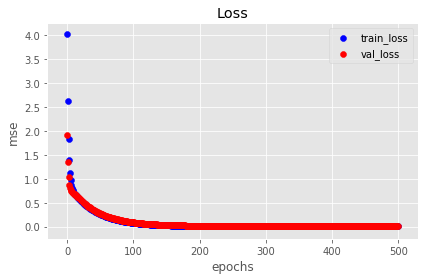

In [7]:
plt.scatter(range(n_epochs), losses, label='train_loss', color='b')
plt.scatter(range(n_epochs), val_losses, label='val_loss', color='r')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()